Loading Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Loading data set

In [2]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
159,160,Female,30,78,73
183,184,Female,29,98,88
158,159,Male,34,78,1
174,175,Female,52,88,13
194,195,Female,47,120,16


In [5]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
99,61,49
75,54,54
30,30,4
52,43,54
22,25,5


Rename Column Name


In [16]:
data = data.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})
data.sample(5)

,income,Score
25,28,82
172,87,10
61,46,55
115,65,50
117,65,59


Check Clusters

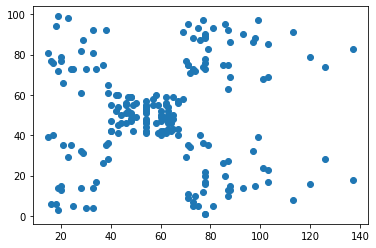

In [18]:
plt.scatter(data['income'],data['Score'])

K Mean Cluster

In [19]:
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error=[]
for k in k_values:
  model = KMeans(n_clusters=k)
  model.fit(data[['income','Score']])
  wcss_error.append(model.inertia_)

Create a plot

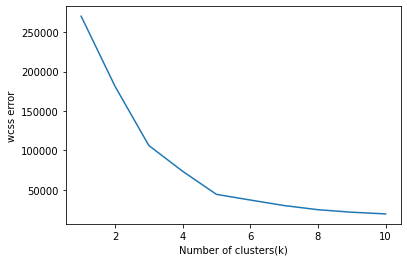

In [21]:
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss error')
plt.plot(k_values,wcss_error)

In [32]:
model = KMeans(n_clusters=5)
pred = model.fit_predict(data)


In [33]:
pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

Get cluter values in one by one


In [34]:
data.head(5)

,income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [36]:
data['cluster'] = pred
data.head(5)

,income,Score,cluster
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


In [37]:
c1 = data[data['cluster']==0]
c1.head(5)

,income,Score,cluster
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0


In [38]:
c1 = data[data['cluster']==0]
c2 = data[data['cluster']==1]
c3 = data[data['cluster']==2]
c4 = data[data['cluster']==3]
c5 = data[data['cluster']==4]

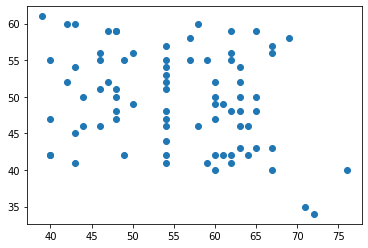

In [40]:
plt.scatter(c1['income'], c1['Score'])

Cluster's centers

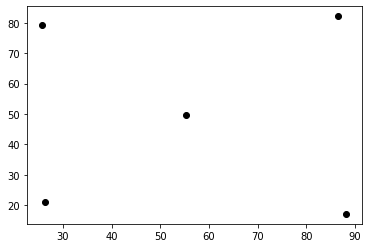

In [41]:
model.cluster_centers_
# cluster's centers in scatterplot
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color='black')